In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import time
import matplotlib.ticker as ticker
from sklearn import preprocessing


In [2]:
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

array([[<Axes: title={'center': 'mass'}>]], dtype=object)

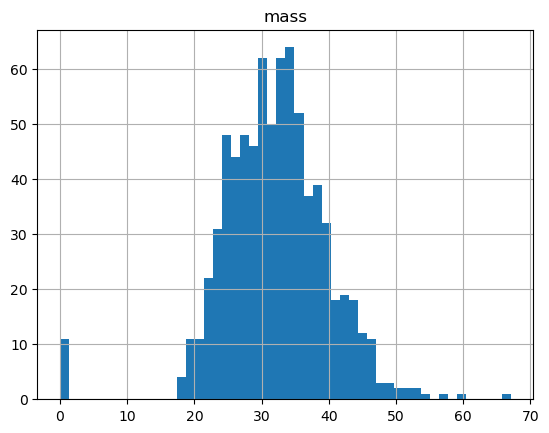

In [5]:
df.hist(column = 'mass', bins = 50)

In [6]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [7]:
x = df[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',]].values

In [8]:
x[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [9]:
y = df['class'].values
y[0:5]

array(['tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive'], dtype=object)

In [10]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [12]:
print('Train set:', x_train.shape, y_train.shape)

Train set: (614, 8) (614,)


In [13]:
print('Test set', x_test.shape, y_test.shape)

Test set (154, 8) (154,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier()
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("KNN model fitted in %.3f s" % dtDia_time)

KNN model fitted in 0.030 s


In [ ]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

In [ ]:
yhat = neigh.predict(x_test)
y[0:5]

In [ ]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat))

In [ ]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(neigh, cv=10)


# Fit the model on the training data
learning_curve.fit(x_train, y_train)

# Plot the learning curve
learning_curve.show()

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros(Ks-1)
confusionMx = [];
for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

    
mean_acc

    

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score,validation_curve, GridSearchCV

param_range = np.arange(1, 10, 1)
#print(param_range)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", param_range=param_range, cv=10)
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve SVM')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
model = KNeighborsClassifier()
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("KNN model fitted in %.3f s" % dtDia_time)

KNN model fitted in 0.004 s
